In [5]:
import cv2
import numpy as np
import pandas as pd
import random
import os
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [3]:
import sklearn
sklearn.__version__

'0.23.1'

In [4]:
cv2.__version__

'4.6.0'

In [8]:
from platform import python_version

print(python_version())

3.8.8


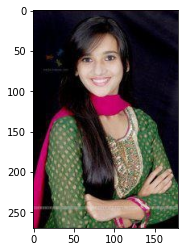

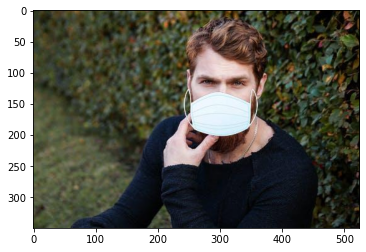

In [2]:
import matplotlib.pyplot as plt

directory= r'C:\Users\Administrator\Desktop\maskdata'
CATEGORIES = ['nomask','mask']

for categorys in CATEGORIES:
  path= os.path.join(directory,categorys)
  for img in os.listdir(path):
    img_array= cv2.imread(os.path.join(path,img))
    img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
    plt.imshow(img_array)
    plt.show()
    break
    break

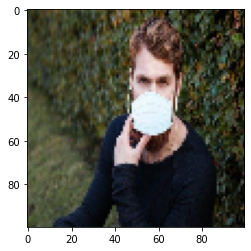

In [3]:
new_image= cv2.resize(img_array,(100,100))
plt.imshow(new_image)
plt.show()

In [ ]:
training_data= []

for categorys in CATEGORIES:
  path= os.path.join(directory,categorys)
  class_label = CATEGORIES.index(categorys)
  for img in os.listdir(path):

    try:
      img_array= cv2.imread(os.path.join(path,img))
      new_array=cv2.resize(img_array,(100,100
      training_data.append([new_array,class_label])
    except Exception as e:
      pass

In [5]:
print(len(training_data))

1580


In [6]:
random.shuffle(training_data)

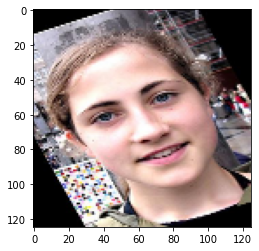

In [7]:
#print(training_data[5][0])
img_array = cv2.cvtColor(training_data[5][0],cv2.COLOR_BGR2RGB)
plt.imshow(img_array)
plt.show()

In [8]:
x=[]
y=[]

for features,label in training_data:
  x.append(features)
  y.append(label)

x=np.array(x,)
y=np.array(y, dtype= 'int32')

In [9]:
x.shape

(1580, 125, 125, 3)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [11]:
print('x Train:',x_train.shape)
print('x Test:',x_test.shape)
print('y Train:',y_train.shape)
print('y Test:',y_test.shape)
y_train

x Train: (1264, 125, 125, 3)
x Test: (316, 125, 125, 3)
y Train: (1264,)
y Test: (316,)


array([0, 1, 1, ..., 1, 1, 0])

0


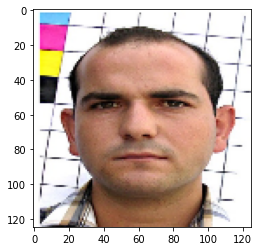

In [12]:
img_array = cv2.cvtColor(x_test[55],cv2.COLOR_BGR2RGB)
print(y_test[55])
plt.imshow(img_array)
plt.show()

In [13]:
x_train = x_train/255.

In [14]:
x_test= x_test/255.

In [15]:
print('x Train:',x_train.shape)
print('x Test:',x_test.shape)
print('y Train:',y_train.shape)
print('y Test:',y_test.shape)

x Train: (1264, 125, 125, 3)
x Test: (316, 125, 125, 3)
y Train: (1264,)
y Test: (316,)


In [16]:
nsamples, nx, ny,nrgb = x_train.shape
x_train = x_train.reshape((nsamples,nx*ny*nrgb))
x_train.shape

(1264, 46875)

In [17]:
nsamples, nx, ny,nrgb = x_test.shape
x_test = x_test.reshape((nsamples,nx*ny*nrgb))
x_test.shape

(316, 46875)

In [18]:
y_train

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
print(etc.score(x_test,y_test))
print(etc.score(x_train,y_train))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=15,n_estimators=100)
rf.fit(x_train,y_train)
print(rf.score(x_test,y_test))
print(rf.score(x_train,y_train))

Text(42.0, 0.5, 'Truth')

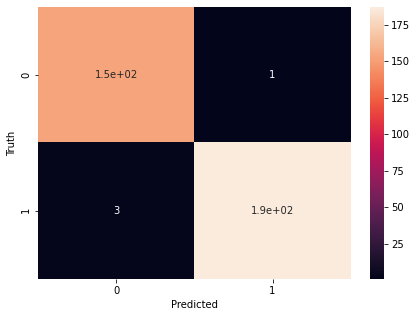

In [234]:
pred = rf.predict(x_test)

cm = confusion_matrix(y_test,pred)


plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [235]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       154
           1       0.99      0.98      0.99       190

    accuracy                           0.99       344
   macro avg       0.99      0.99      0.99       344
weighted avg       0.99      0.99      0.99       344



In [1]:
import pickle
import cv2
import matplotlib.pyplot as plt

In [ ]:
pickle.dump(rf,open('rfmodel.pkl','wb'))

In [2]:
model = pickle.load(open('rfmodel.pkl','rb'))

In [242]:
new =model.predict(x_test)

print(classification_report(y_test,new))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       154
           1       0.99      0.98      0.99       190

    accuracy                           0.99       344
   macro avg       0.99      0.99      0.99       344
weighted avg       0.99      0.99      0.99       344



In [ ]:
etcmodel = pickle.load(open(r'C:\Users\Administrator\Desktop\Machine Learning\etcmodel.pkl','rb'))

In [3]:
def predict(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (125,125))
    img = img/255.0
    print(img.shape)
    plt.axis('off')
    plt.imshow(img)
    nx, ny,nrgb = img.shape
    img = img.reshape((1,nx*ny*nrgb))
    pred = model.predict(img)
    
    if pred == 1:
        print('With Mask')
    else:
        print('No Mask')

(125, 125, 3)
No Mask


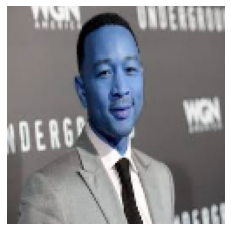

In [4]:
predict(r'C:\Users\Administrator\Desktop\images.jpg')

In [4]:
def detect(img):
   
    nx,ny,nrgb = img.shape
    img = img.reshape((1,nx*ny*nrgb))
    pred = model.predict(img)
    
    return pred

In [5]:
def label(img,text,pos,bg):
    text_size = cv2.getTextSize(text,cv2.FONT_HERSHEY_COMPLEX,2,cv2.FILLED)
    
    end_x = pos[0] + text_size[0][0] + 5
    end_y = pos[1] + text_size[0][1] - 5
    
    cv2.rectangle(img,pos,(end_x,end_y),bg,cv2.FILLED)
    cv2.putText(img,text,pos,cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),1,cv2.LINE_AA)

In [6]:
def detectface(img):
    crd = haar.detectMultiScale(img)
    return crd

In [7]:
haar = cv2.CascadeClassifier(r'C:\Users\Administrator\Desktop\Machine Learning\haarcascade_frontalface_default.xml')

In [13]:
cap = cv2.VideoCapture(0)

Only Mask

In [9]:
while True:
    ret,frame = cap.read()
    frame = cv2.rotate(frame,cv2.ROTATE_180)
    img = cv2.resize(frame,(125,125))
    
    y_pred = detect(img)
    
    if y_pred == 1:
        label(frame,'Mask',(30,30),(0,255,0))
    else:
        label(frame,'No Mask',(30,30),(0,0,255))
        
    
    cv2.imshow('window',frame)
    
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break
        
cv2.destroyAllWindows()

Mask with Face Deection

In [12]:
while True:
    ret,frame = cap.read()
    frame = cv2.rotate(frame,cv2.ROTATE_180)
    img = cv2.resize(frame,(125,125))
    
    y_pred = detect(img)
    
    crd = detectface(cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY))
    for x,y,w,h in crd:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    
    if y_pred == 1:
        label(frame,'Mask',(30,30),(0,255,0))
    else:
        label(frame,'No Mask',(30,30),(0,0,255))
        
    
    cv2.imshow('window',frame)
    
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break
        
cv2.destroyAllWindows()

Only Face Detection

In [19]:
while True:
    ret,frame = cap.read()
    frame = cv2.rotate(frame,cv2.ROTATE_180)
        
    crd = detectface(cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY))
    for x,y,w,h in crd:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    
    cv2.imshow('window',frame)
    
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break
        
cv2.destroyAllWindows()

In [1]:
!pip install opencv-python

In [1]:
import cv2
cv2.__version__

'4.6.0'